In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

from pycaret.regression import *

from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_validate, KFold
import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pq.read_table('train.parquet')


df = df.to_pandas()

df_test = pq.read_table('test.parquet')


df_test = df_test.to_pandas()

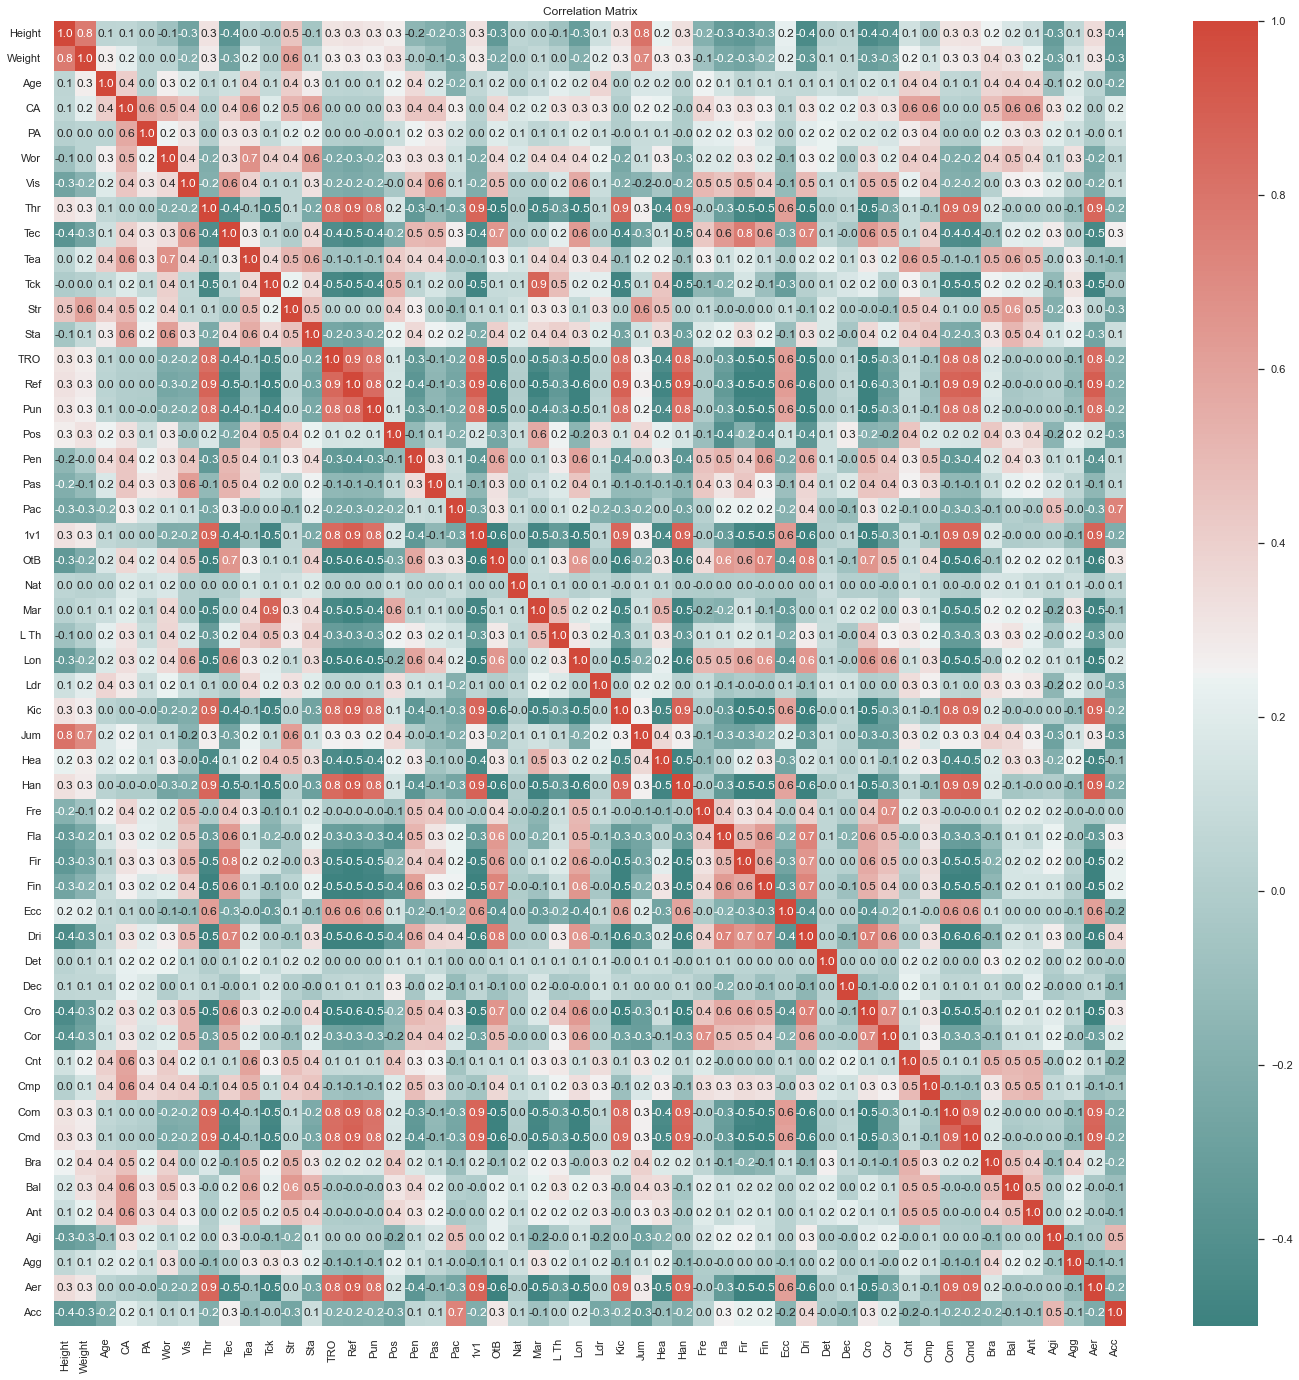

In [3]:
cor_mat = df.corr()

# Korelasyon matrisi görseli oluşturma
plt.figure(figsize=(24, 24))
sns.set(style="white")
cmap = sns.diverging_palette(188, 15, as_cmap=True)
sns.heatmap(cor_mat, annot=True, fmt=".1f", cmap=cmap, vmin=-0.5, vmax=1)
plt.title("Correlation Matrix")
plt.show()

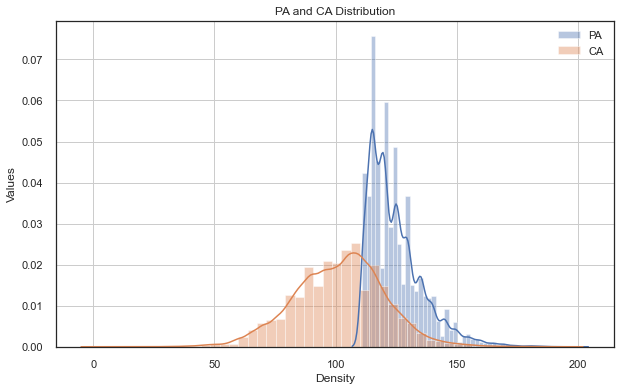

In [4]:
plt.figure(figsize=(10, 6))

# PA değerlerinin dağılımı
sns.distplot(df["PA"], hist=True, kde=True, label="PA")

# CA değerlerinin dağılımı
sns.distplot(df["CA"], hist=True, kde=True, label="CA")

plt.title("PA and CA Distribution")
plt.xlabel("Density")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

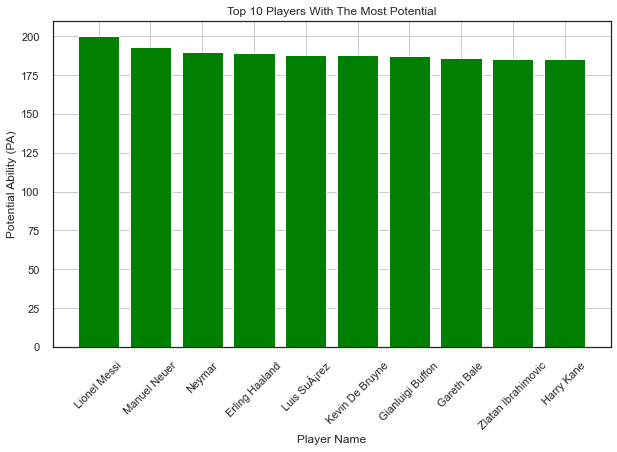

In [5]:
top_potential_players = df.sort_values(by="PA", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_potential_players["Name"], top_potential_players["PA"], color="green")
plt.title("Top 10 Players With The Most Potential")
plt.xlabel("Player Name")
plt.ylabel("Potential Ability (PA)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

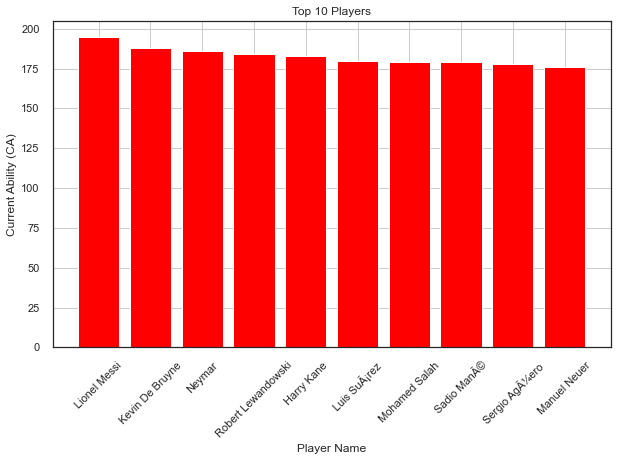

In [6]:
top_current_players = df.sort_values(by="CA", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_current_players["Name"], top_current_players["CA"], color="red")
plt.title("Top 10 Players")
plt.xlabel("Player Name")
plt.ylabel("Current Ability (CA)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

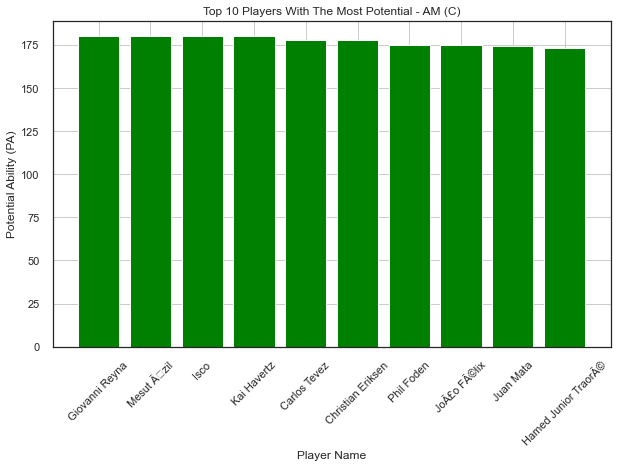

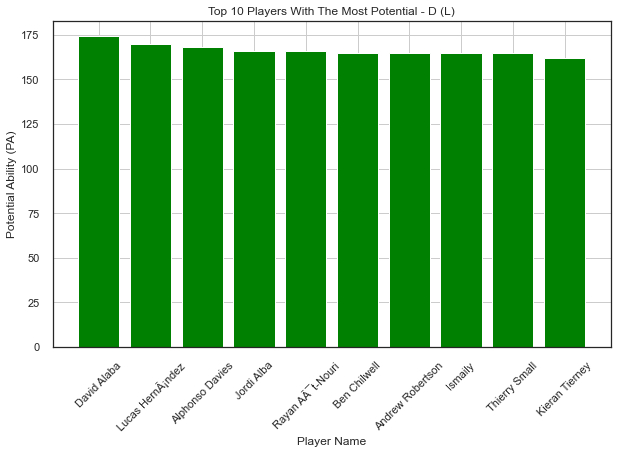

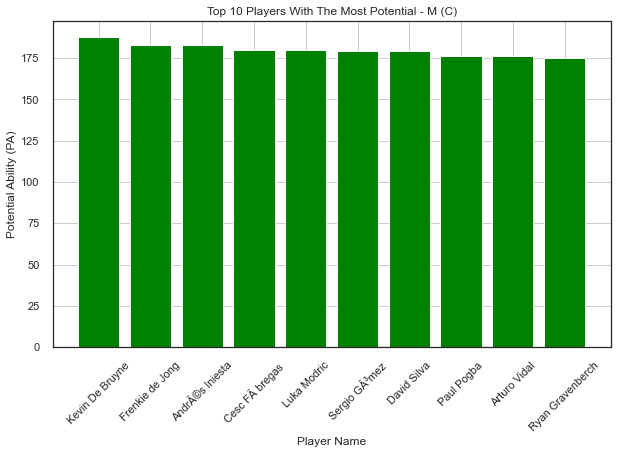

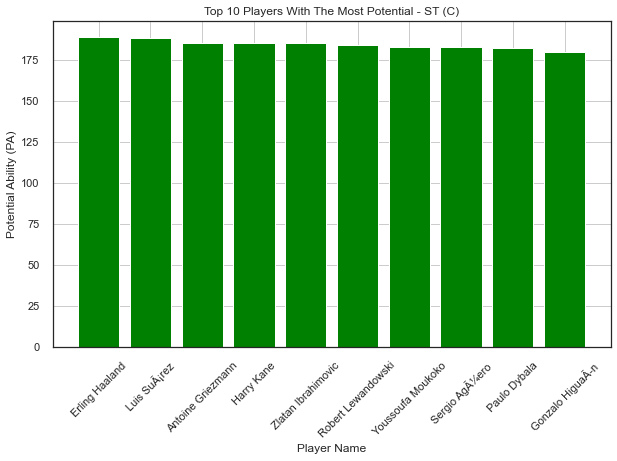

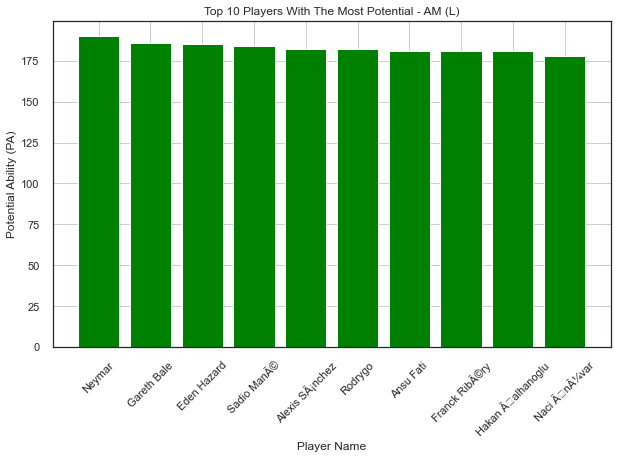

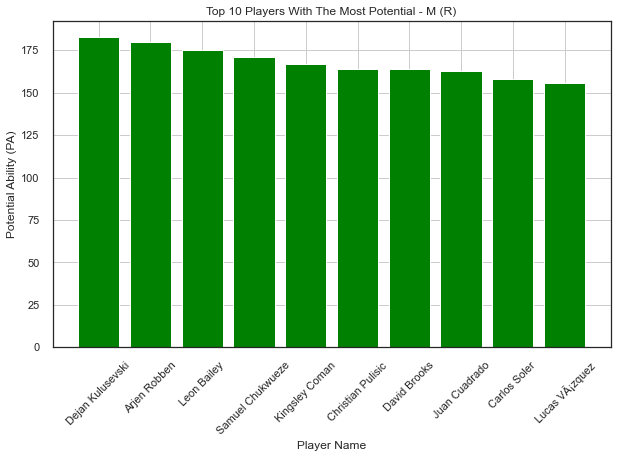

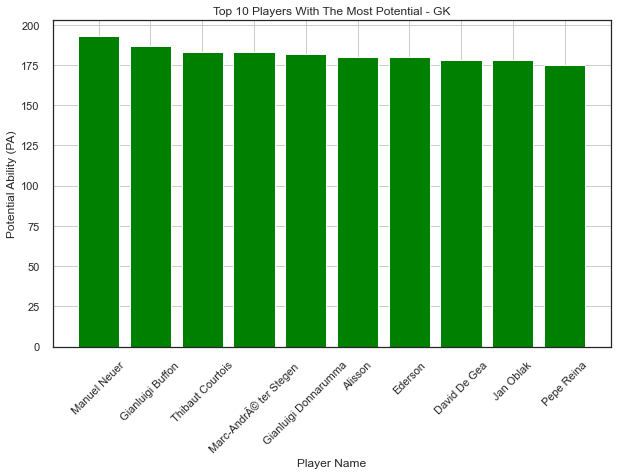

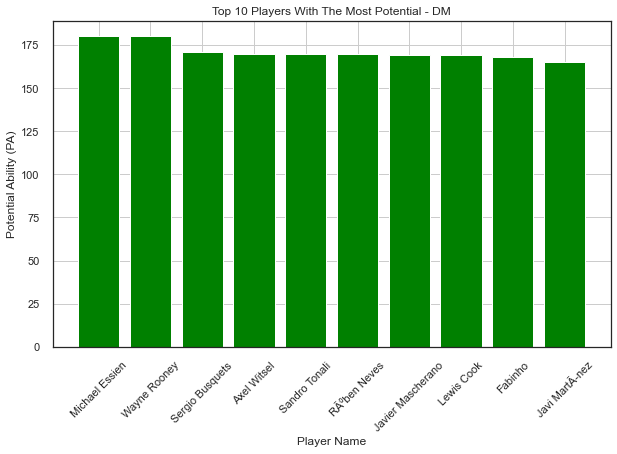

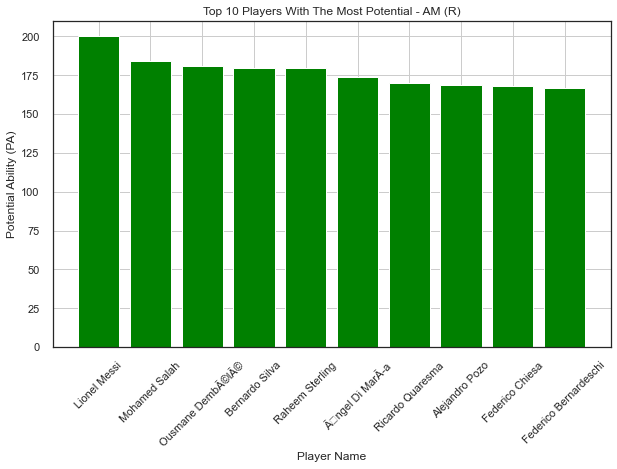

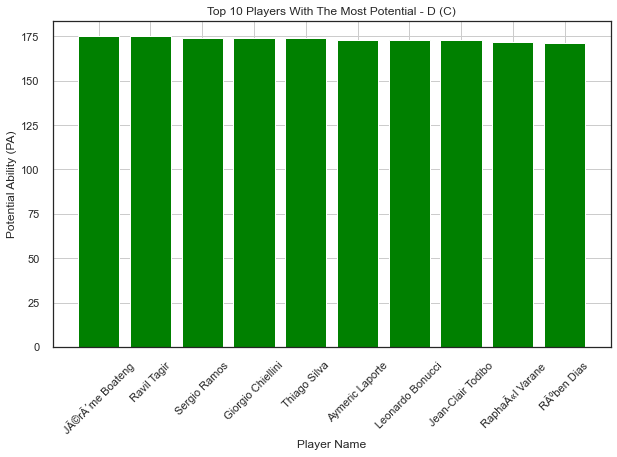

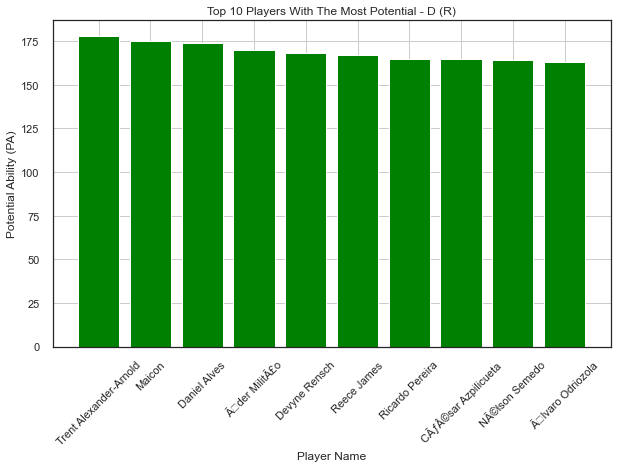

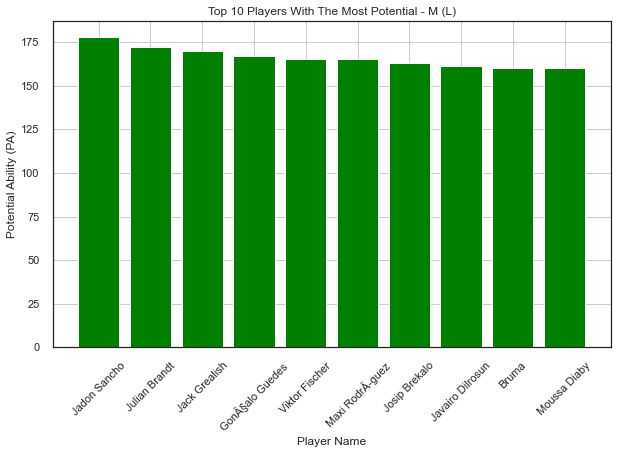

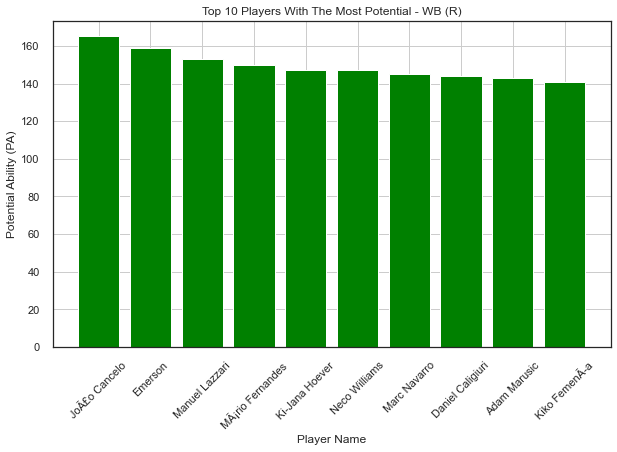

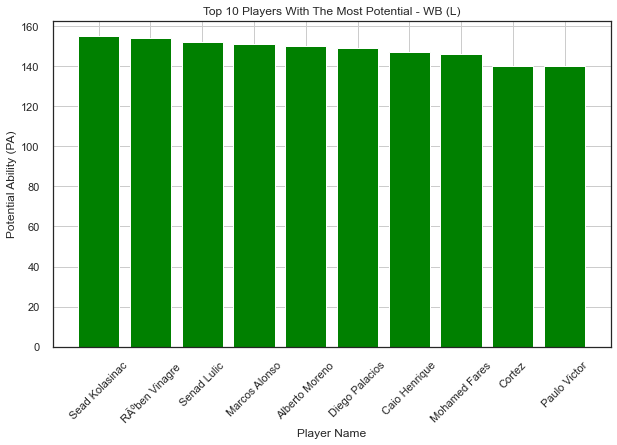

In [7]:
top_players_by_position = df.groupby("Best Pos").apply(lambda x: x.nlargest(10, "PA")).reset_index(drop=True)
unique_positions = df["Best Pos"].unique()

for position in unique_positions:
    position_df = top_players_by_position[top_players_by_position["Best Pos"] == position]
    
    plt.figure(figsize=(10, 6))
    plt.bar(position_df["Name"], position_df["PA"], color="green")
    plt.title(f"Top 10 Players With The Most Potential - {position}")
    plt.xlabel("Player Name")
    plt.ylabel("Potential Ability (PA)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

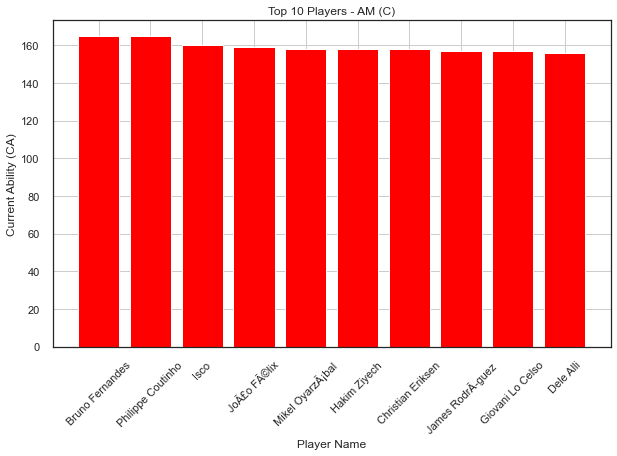

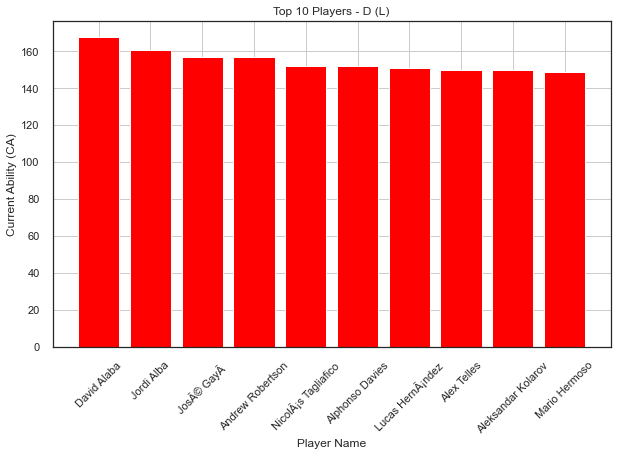

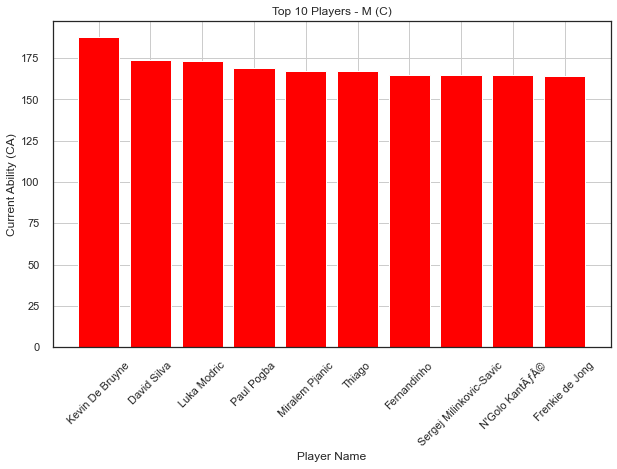

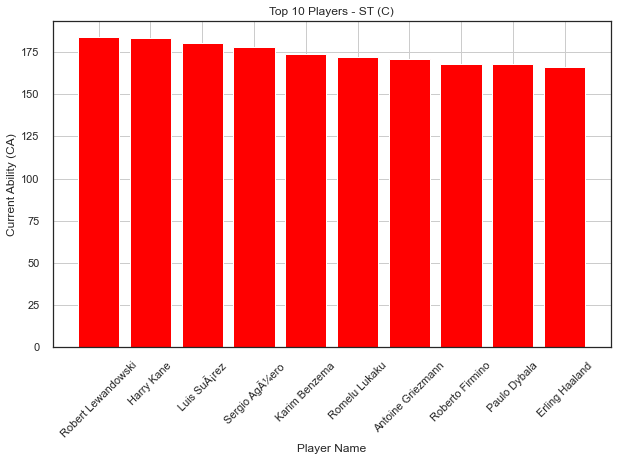

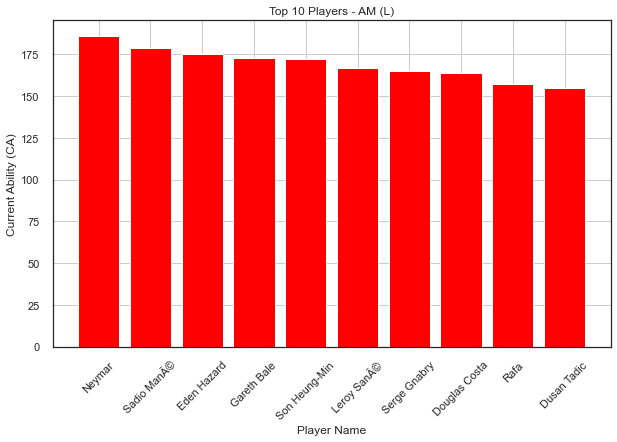

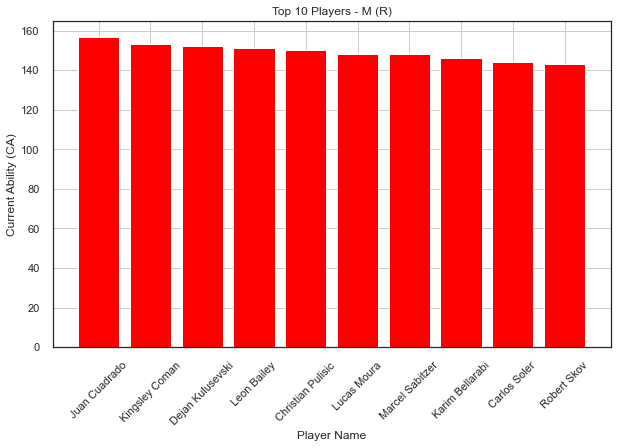

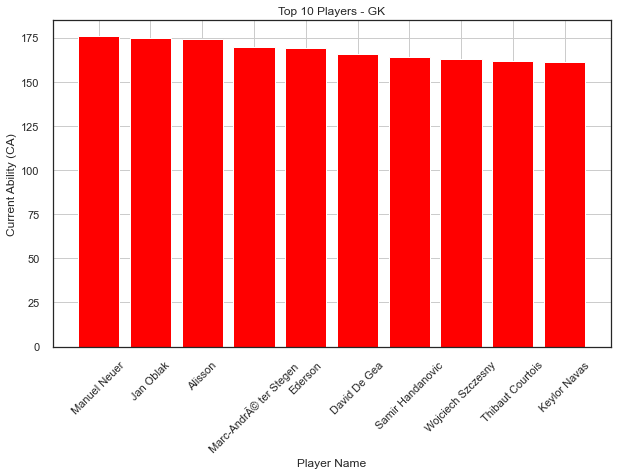

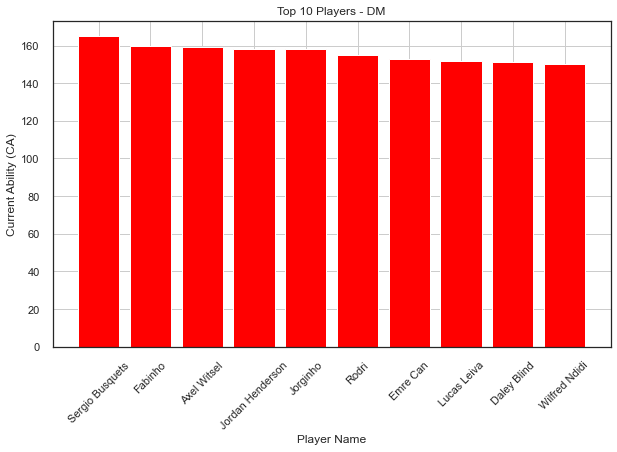

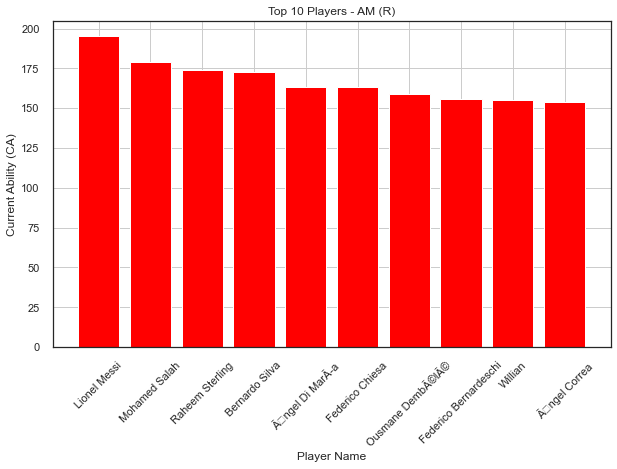

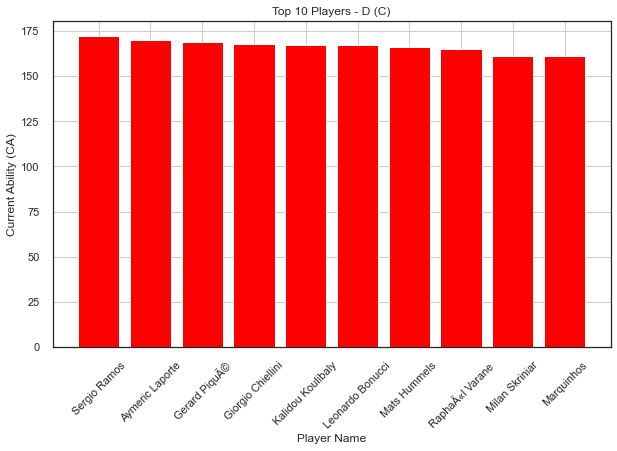

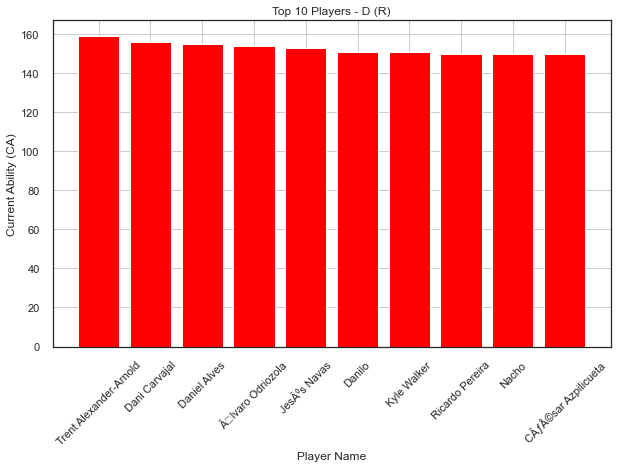

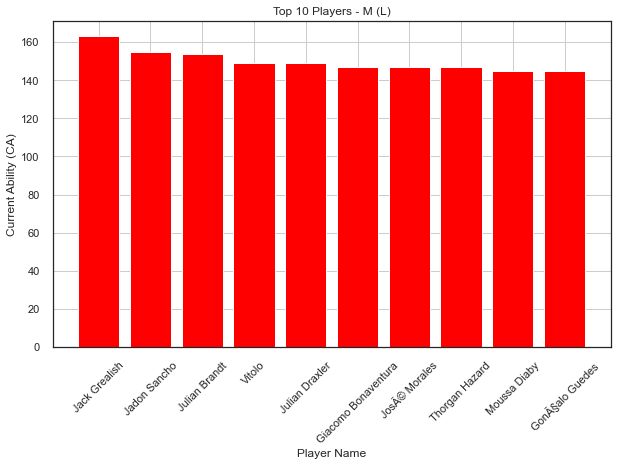

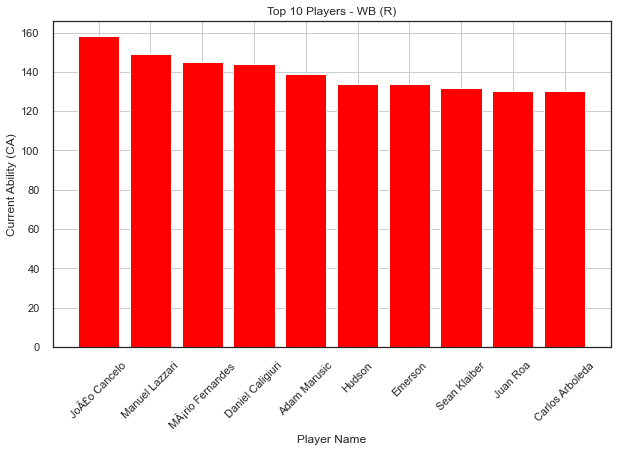

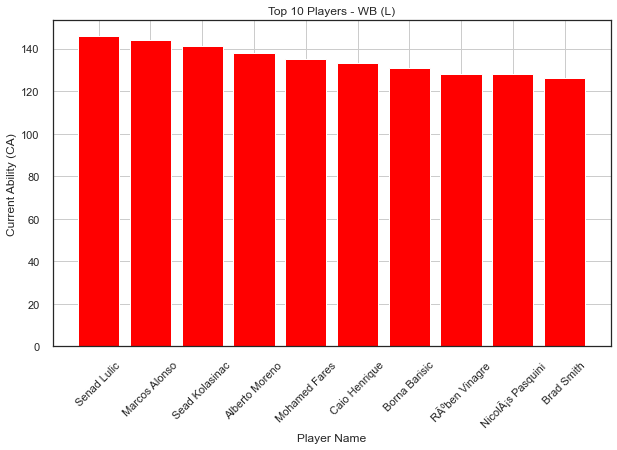

In [8]:
top__current_players_by_position = df.groupby("Best Pos").apply(lambda x: x.nlargest(10, "CA")).reset_index(drop=True)
unique_positions = df["Best Pos"].unique()

for position in unique_positions:
    position_df = top__current_players_by_position[top__current_players_by_position["Best Pos"] == position]
    
    plt.figure(figsize=(10, 6))
    plt.bar(position_df["Name"], position_df["CA"], color="red")
    plt.title(f"Top 10 Players - {position}")
    plt.xlabel("Player Name")
    plt.ylabel("Current Ability (CA)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

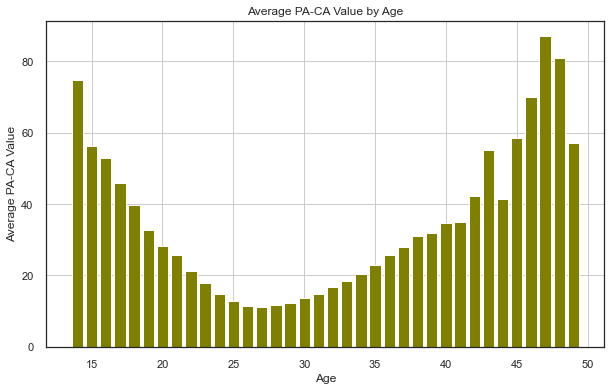

In [9]:
df["PA_CA"] = df["PA"] - df["CA"]

age_avg_paca = df.groupby("Age")["PA_CA"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(age_avg_paca["Age"], age_avg_paca["PA_CA"], color="olive")
plt.title("Average PA-CA Value by Age")
plt.xlabel("Age")
plt.ylabel("Average PA-CA Value")
plt.grid(True)
plt.show()

In [10]:
df.sample(5)

,Name,Position,Height,Weight,Age,Preferred Foot,Best Pos,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,PA_CA
10318,Cristian Zone,ST (C),178,70,20,Right,ST (C),90,115,13,10,1,8,9,5,8,12,3,2,3,10,9,8,12,3,13,20,8,5,10,7,3,5,12,3,9,6,12,12,1,9,16,12,10,9,8,14,1,3,5,12,9,11,8,1,14,25
6272,Juan Manuel Torres,"DM, M (C)",173,67,34,Right,DM,106,138,11,12,1,11,16,14,13,11,2,2,3,15,9,11,9,3,10,10,14,4,7,12,1,8,2,3,5,7,12,10,2,13,15,14,12,6,10,11,3,2,18,14,13,10,17,1,11,32
27429,FabiÃ¡n MonzÃ³n,D/WB/M (L),178,75,32,Left,D (L),120,146,16,11,3,14,15,13,13,11,2,2,3,8,15,12,12,2,13,12,12,16,17,8,3,10,10,4,16,12,13,8,2,13,16,9,15,13,8,15,2,2,15,15,12,11,13,1,12,26
7543,Matt Everitt,M/AM (RL),180,62,16,Left,AM (L),63,116,13,9,3,8,8,2,3,6,2,3,3,4,1,13,13,2,12,18,5,5,8,4,1,9,5,1,6,8,7,7,2,8,9,6,13,9,2,7,2,2,7,10,6,10,7,1,14,53
15244,AudÃ¡lio,"D (C), DM",186,82,33,Right Only,D (C),92,116,12,11,2,10,12,12,13,12,1,1,3,11,4,11,12,1,12,12,12,5,4,11,2,12,11,3,4,11,5,6,3,4,11,12,5,3,10,11,3,1,13,12,11,11,12,1,12,24


In [11]:
df["Preferred Foot"] = df["Preferred Foot"].replace({"Right Only": "Right", "Left Only": "Left"})

In [12]:
df = pd.get_dummies(df, columns = ["Preferred Foot"])

In [13]:
df_test["Preferred Foot"] = df_test["Preferred Foot"].replace({"Right Only": "Right", "Left Only": "Left"})
df_test = pd.get_dummies(df_test, columns = ["Preferred Foot"])

In [14]:
df = pd.get_dummies(df, columns = ["Best Pos"])
df_test = pd.get_dummies(df_test, columns = ["Best Pos"])

In [15]:
df

,Name,Position,Height,Weight,Age,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,PA_CA,Preferred Foot_Either,Preferred Foot_Left,Preferred Foot_Right,Best Pos_AM (C),Best Pos_AM (L),Best Pos_AM (R),Best Pos_D (C),Best Pos_D (L),Best Pos_D (R),Best Pos_DM,Best Pos_GK,Best Pos_M (C),Best Pos_M (L),Best Pos_M (R),Best Pos_ST (C),Best Pos_WB (L),Best Pos_WB (R)
0,Kylian Sylvestre,AM (C),176,60,16,70,115,12,8,3,13,7,6,4,9,3,4,3,2,4,12,13,1,9,16,4,1,7,11,1,7,6,1,6,13,13,7,1,8,11,13,5,6,5,4,3,3,8,7,9,13,12,1,13,45,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Volodymyr Polyovyi,D/WB (L),171,64,33,110,125,15,11,3,12,13,11,9,13,2,1,4,12,8,12,12,3,15,11,11,13,12,12,2,7,5,3,12,14,12,5,2,10,10,9,11,13,10,12,1,1,14,9,11,13,16,3,12,15,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Imanol GarcÃ­a,"DM, M (C)",184,75,23,105,120,12,15,1,11,13,11,7,9,3,3,1,12,5,12,14,3,9,12,9,4,13,13,2,7,9,3,9,1,12,11,3,11,9,12,8,9,13,11,1,1,10,11,14,13,13,4,9,15,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Roger MartÃ­,ST (C),179,74,28,138,140,14,12,3,12,16,8,12,14,3,3,1,7,14,13,13,2,16,16,6,7,12,9,1,10,13,3,9,14,13,16,2,11,14,14,10,6,14,13,1,3,13,12,15,13,12,3,13,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Domagoj Drozdjek,"M (L), AM (LC), ST (C)",180,73,23,110,117,13,11,4,13,9,4,10,12,2,3,2,6,10,13,13,3,13,15,4,5,9,6,1,9,8,2,10,14,11,10,2,14,12,7,10,9,7,12,1,3,10,8,11,16,13,3,14,7,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33079,Braulio Guisolfo,DM,180,75,17,69,120,7,13,3,15,8,13,8,7,3,3,1,9,3,9,9,4,6,13,8,6,10,4,1,10,7,4,7,1,15,8,3,4,12,15,6,7,8,8,3,3,7,8,8,8,6,3,8,51,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
33080,ElÃ­zio,D/WB (L),176,70,31,88,118,13,8,2,10,11,12,11,12,2,2,1,11,7,10,11,3,11,13,12,12,9,5,2,15,13,1,8,9,10,7,3,9,12,10,11,10,9,11,3,1,13,10,12,10,13,2,11,30,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
33081,Kortney Hause,D (LC),188,84,23,125,138,13,9,1,11,12,14,15,15,3,1,1,13,6,11,14,1,11,12,13,12,5,10,2,14,14,2,5,7,10,6,2,9,9,12,6,5,11,12,2,1,12,12,13,14,11,3,14,13,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
33082,Bradley Johnson,"DM, M (LC)",183,81,32,116,134,12,9,2,12,14,13,14,15,1,2,1,13,12,11,11,3,12,14,13,9,11,14,3,10,12,2,12,8,12,13,3,11,13,12,12,9,13,12,2,2,14,12,14,12,15,1,9,18,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [16]:
reg = setup(data=df.drop(columns=["Name","Position",  "PA", "PA_CA"]), target='CA', preprocess=False)

,Description,Value
0,Session id,1887
1,Target,CA
2,Target type,Regression
3,Original data shape,"(33084, 68)"
4,Transformed data shape,"(33084, 68)"
5,Transformed train set shape,"(23158, 68)"
6,Transformed test set shape,"(9926, 68)"
7,Numeric features,67


In [17]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,3.7502,24.9602,4.9942,0.9278,0.0579,0.0406,2.7330
lightgbm,Light Gradient Boosting Machine,4.2898,32.0285,5.6576,0.9073,0.0642,0.0460,1.3490
xgboost,Extreme Gradient Boosting,4.5948,36.2724,6.0205,0.8950,0.0675,0.0490,2.2250
gbr,Gradient Boosting Regressor,4.9249,41.3761,6.4293,0.8804,0.0733,0.0533,2.7560
ridge,Ridge Regression,5.1077,44.6289,6.6787,0.8708,0.0739,0.0536,0.9350
lar,Least Angle Regression,5.1076,44.6298,6.6787,0.8708,0.0739,0.0536,1.0360
br,Bayesian Ridge,5.1096,44.6276,6.6786,0.8708,0.0739,0.0536,0.9950
lr,Linear Regression,5.1076,44.6273,6.6786,0.8708,0.0739,0.0536,1.3470
et,Extra Trees Regressor,5.1294,44.8140,6.6919,0.8704,0.0753,0.0554,4.9480
rf,Random Forest Regressor,5.4468,50.8733,7.1305,0.8529,0.0789,0.0583,7.2910


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [18]:
x=df.drop(columns=["Name","Position", "CA","PA","PA_CA"])
y=df.CA

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=33)

In [20]:
catboost = CatBoostRegressor(verbose=False)
catboost.fit(x_train, y_train)
y_pred = catboost.predict(x_test)

In [21]:
# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# R2 Score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

MAE: 3.772727467280145
MSE: 25.36820957924272
RMSE: 5.036686368957543
R2 Score: 0.9279575708923525


In [22]:
kf = KFold(n_splits=10, shuffle=True, random_state=33)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
results = cross_validate(catboost, x, y, cv=kf, scoring=scoring)


# Sonuçları yazdırın
print("Cross-Validation MAE Scores:", -results['test_neg_mean_absolute_error'].mean())
print("Cross-Validation MSE Scores:", -results['test_neg_mean_squared_error'].mean())
print("Cross-Validation RMSE Scores:", np.sqrt(-results['test_neg_mean_squared_error'].mean()))
print("Cross-Validation R2 Scores:", results['test_r2'].mean())

Cross-Validation MAE Scores: 3.6891939955444166
Cross-Validation MSE Scores: 24.087437599623218
Cross-Validation RMSE Scores: 4.907895434870554
Cross-Validation R2 Scores: 0.9306744213887119


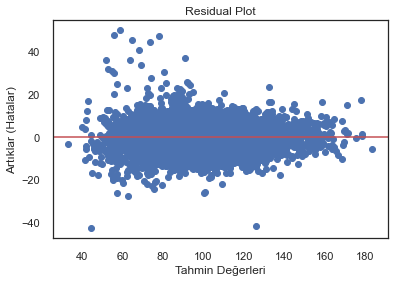

In [23]:
plt.scatter(y_pred, y_test-y_pred)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Tahmin Değerleri')
plt.ylabel('Artıklar (Hatalar)')
plt.title('Residual Plot')
plt.show()

In [267]:
param_grid = {
    'learning_rate': [0.05,0.25],
    'depth': [5,6],
    'iterations': [3500,4000],
    "l2_leaf_reg":[4,5]
   
}

In [268]:
grid_search = GridSearchCV(catboost, param_grid, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
# veya
#random_search = RandomizedSearchCV(catboost, param_distributions=param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv=3)



grid_search.fit(x_train, y_train)
# veya
#random_search.fit(x_train, y_train)


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001C3C39A4460>,
             n_jobs=-1,
             param_grid={'depth': [5, 6], 'iterations': [3500, 4000],
                         'l2_leaf_reg': [4, 5], 'learning_rate': [0.05, 0.25]},
             scoring='neg_mean_absolute_error')

In [269]:
print("En İyi Hiperparametreler:", grid_search.best_params_)
print("En İyi Skor:", -grid_search.best_score_)

En İyi Hiperparametreler: {'depth': 5, 'iterations': 3500, 'l2_leaf_reg': 5, 'learning_rate': 0.05}
En İyi Skor: 3.7792547433902097


In [139]:
'''
param_grid = {
    'learning_rate': [0.05,0.075],
    'depth': [6,7],
    'iterations': [2500,3500],
    "l2_leaf_reg":[2,3,4]
   
}

En İyi Hiperparametreler: {'depth': 6, 'iterations': 3500, 'l2_leaf_reg': 4, 'learning_rate': 0.05}
En İyi Skor: 3.7810776349634936

Cross-Validation MAE Scores: 3.599976855824051
Cross-Validation MSE Scores: 23.05257436431287
Cross-Validation RMSE Scores: 4.801309650950756
Cross-Validation R2 Scores: 0.9336508642731409

3.7968698004370003 test hatası

'''
############


'\nparam_grid = {\n    \'learning_rate\': [0.05,0.075],\n    \'depth\': [6,7],\n    \'iterations\': [2500,3500],\n    "l2_leaf_reg":[2,3,4]\n   \n}\n\nEn İyi Hiperparametreler: {\'depth\': 6, \'iterations\': 3500, \'l2_leaf_reg\': 4, \'learning_rate\': 0.05}\nEn İyi Skor: 3.7810776349634936\n\nCross-Validation MAE Scores: 3.599976855824051\nCross-Validation MSE Scores: 23.05257436431287\nCross-Validation RMSE Scores: 4.801309650950756\nCross-Validation R2 Scores: 0.9336508642731409\n\n3.7968698004370003 test hatası\n\n'

In [270]:
catboost_h = CatBoostRegressor(**grid_search.best_params_, verbose=False)

In [271]:
catboost_h.fit(x_train, y_train)
y_pred_h = catboost_h.predict(x_test)

In [272]:
# MAE (Mean Absolute Error)
mae_h = mean_absolute_error(y_test, y_pred_h)
print("MAE:", mae_h)

# MSE (Mean Squared Error)
mse_h = mean_squared_error(y_test, y_pred_h)
print("MSE:", mse_h)

# RMSE (Root Mean Squared Error)
rmse_h = mean_squared_error(y_test, y_pred_h, squared=False)
print("RMSE:", rmse_h)

# R2 Score
r2_h = r2_score(y_test, y_pred_h)
print("R2 Score:", r2_h)

MAE: 3.7023148269860804
MSE: 24.693983269736208
RMSE: 4.969304103165372
R2 Score: 0.929872286274745


In [273]:
kf = KFold(n_splits=5, shuffle=True, random_state=33)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
results = cross_validate(catboost_h, x, y, cv=kf, scoring=scoring)


# Sonuçları yazdırın
print("Cross-Validation MAE Scores:", -results['test_neg_mean_absolute_error'].mean())
print("Cross-Validation MSE Scores:", -results['test_neg_mean_squared_error'].mean())
print("Cross-Validation RMSE Scores:", np.sqrt(-results['test_neg_mean_squared_error'].mean()))
print("Cross-Validation R2 Scores:", results['test_r2'].mean())

Cross-Validation MAE Scores: 3.6321649418023085
Cross-Validation MSE Scores: 23.48645316050651
Cross-Validation RMSE Scores: 4.84628240618585
Cross-Validation R2 Scores: 0.9324134349255923


In [274]:
mean_absolute_error(df_test.CA,catboost_h.predict(df_test.drop(columns=["Name","Position","CA","PA"])))

3.8424779180968915

In [24]:
mean_absolute_error(df_test.CA,catboost.predict(df_test.drop(columns=["Name","Position","CA","PA"])))

3.8755695895233777

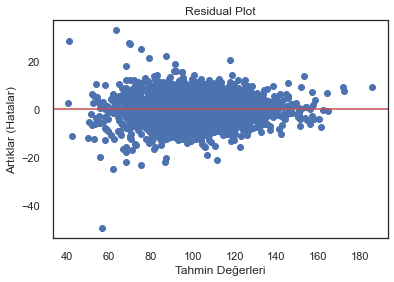

In [25]:
plt.scatter(catboost.predict(df_test.drop(columns=["Name","Position","CA","PA"])), df_test.CA-catboost.predict(df_test.drop(columns=["Name","Position","CA","PA"])))
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Tahmin Değerleri')
plt.ylabel('Artıklar (Hatalar)')
plt.title('Residual Plot')
plt.show()

## Forwards

In [50]:
df_forwards =  df[(df["Best Pos"] == "AM (R)") | (df["Best Pos"] == "AM (L)") | (df["Best Pos"] == "ST (C)") | (df["Best Pos"] == "M (L)") | (df["Best Pos"] == "M (R)")]


df_forwards_test =  df_test[(df_test["Best Pos"] == "AM (R)") | (df_test["Best Pos"] == "AM (L)") | (df_test["Best Pos"] == "ST (C)") | (df_test["Best Pos"] == "M (L)") | (df_test["Best Pos"] == "M (R)")]

In [51]:
df_forwards.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)

df_forwards_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_17824\3086581086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forwards.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)
C:\Users\Mehmet\AppData\Local\Temp\ipykernel_17824\3086581086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forwards_test.drop(columns=["Thr", "TRO", "Ref", "Pun", "1v1", "Kic", "Han", "Ecc", "Com", "Cmd", "Aer", "Mar", "Tck" ], inplace=True)


In [53]:
df_forwards.reset_index(inplace=True, drop=True)

df_forwards_test.reset_index(inplace=True, drop=True)
df_forwards

,Name,Position,Height,Weight,Age,Best Pos,CA,PA,Wor,Vis,Tec,Tea,Str,Sta,Pos,Pen,Pas,Pac,OtB,Nat,L Th,Lon,Ldr,Jum,Hea,Fre,Fla,Fir,Fin,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,PA_CA,Preferred Foot_Either,Preferred Foot_Left,Preferred Foot_Right
0,Roger MartÃ­,ST (C),179,74,28,ST (C),138,140,14,12,12,16,12,14,7,14,13,13,16,16,7,12,9,10,13,9,14,13,16,11,14,14,10,6,14,13,13,12,15,13,12,13,2,0,0,1
1,Domagoj Drozdjek,"M (L), AM (LC), ST (C)",180,73,23,AM (L),110,117,13,11,13,9,10,12,6,10,13,13,13,15,5,9,6,9,8,10,14,11,10,14,12,7,10,9,7,12,10,8,11,16,13,14,7,0,0,1
2,Marcelo Aguirre,"M (R), AM (RC)",171,79,35,M (R),102,112,10,12,13,11,7,9,7,6,13,12,16,12,5,16,12,8,5,12,7,14,13,12,12,12,14,5,12,6,11,9,13,11,10,12,10,0,0,1
3,Yeison GuzmÃ¡n,AM (RLC),170,70,21,AM (R),108,116,11,12,13,12,8,11,11,11,13,12,13,12,5,14,11,8,9,13,13,12,12,14,12,10,12,13,11,13,6,10,10,12,8,12,8,0,0,1
4,Rodriguinho,"AM (R), ST (C)",174,77,36,ST (C),83,130,14,10,9,11,10,12,4,13,9,11,11,13,2,8,9,6,9,8,12,10,10,9,8,8,9,10,12,11,13,11,11,10,15,12,47,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,Komlan AgbÃ©gniadan,AM (RL),165,65,28,AM (R),107,117,12,12,14,12,9,11,9,7,12,13,12,12,7,12,10,8,10,9,13,12,12,13,14,12,10,11,11,12,12,11,12,14,12,13,10,0,0,1
11126,Ismael Tajouri-Shradi,"AM (RL), ST (C)",168,64,25,AM (R),119,130,14,12,13,13,8,13,9,11,16,13,14,12,8,13,8,7,7,9,13,13,13,13,14,11,7,7,11,11,12,8,8,13,7,15,11,0,1,0
11127,Darko Lazovic,"D (L), WB/M (RL)",181,66,28,M (L),131,137,13,11,13,12,9,14,11,8,12,15,15,12,5,12,11,10,9,9,14,13,11,12,9,11,13,11,11,11,10,12,12,13,11,15,6,0,0,1
11128,Diogo GonÃ§alves,AM (RLC),174,61,22,AM (R),110,130,10,11,13,10,7,11,9,10,10,13,12,13,9,13,8,6,7,12,12,12,12,13,14,9,12,12,8,11,8,11,10,14,10,14,20,0,0,1


In [101]:
reg = setup(data=df_forwards.drop(columns=["Name","Position", "Best Pos", "PA","PA_CA"]), target='CA', preprocess=False)

,Description,Value
0,Session id,8305
1,Target,CA
2,Target type,Regression
3,Original data shape,"(11130, 41)"
4,Transformed data shape,"(11130, 41)"
5,Transformed train set shape,"(7790, 41)"
6,Transformed test set shape,"(3340, 41)"
7,Numeric features,40


In [102]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,4.0920,28.3753,5.3248,0.9162,0.0587,0.0432,1.0990
lightgbm,Light Gradient Boosting Machine,4.5576,34.6319,5.8814,0.8977,0.0645,0.0480,0.9630
gbr,Gradient Boosting Regressor,4.7938,38.2436,6.1812,0.8870,0.0677,0.0506,0.8780
ridge,Ridge Regression,4.6799,40.1489,6.3227,0.8810,0.0726,0.0487,0.8330
lr,Linear Regression,4.6799,40.1489,6.3227,0.8810,0.0726,0.0487,1.2570
lar,Least Angle Regression,4.6799,40.1489,6.3227,0.8810,0.0726,0.0487,0.9320
br,Bayesian Ridge,4.6809,40.1611,6.3236,0.8809,0.0726,0.0487,0.7580
xgboost,Extreme Gradient Boosting,5.0266,42.6010,6.5230,0.8742,0.0710,0.0526,0.9780
en,Elastic Net,4.9422,43.6912,6.5994,0.8707,0.0740,0.0515,0.9320
lasso,Lasso Regression,4.9762,44.0552,6.6277,0.8696,0.0740,0.0518,1.1030


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [103]:
x=df_forwards.drop(columns=["Name","Position", "Best Pos", "CA","PA","PA_CA"])
y=df_forwards.CA

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=33)

In [105]:
catboost = CatBoostRegressor(verbose=False)

In [106]:
catboost.fit(x_train, y_train)

In [107]:
y_pred = catboost.predict(x_test)

In [108]:
# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# R2 Score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

MAE: 4.113446019157328
MSE: 28.921003144055305
RMSE: 5.377825131412819
R2 Score: 0.9130894352674018


In [121]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
results = cross_validate(catboost, x, y, cv=10, scoring=scoring)


# Sonuçları yazdırın
print("Cross-Validation MAE Scores:", -results['test_neg_mean_absolute_error'].mean())
print("Cross-Validation MSE Scores:", -results['test_neg_mean_squared_error'].mean())
print("Cross-Validation RMSE Scores:", np.sqrt(-results['test_neg_mean_squared_error'].mean()))
print("Cross-Validation R2 Scores:", results['test_r2'].mean())

Cross-Validation MAE Scores: 4.0353928298744615
Cross-Validation MSE Scores: 27.92543925138427
Cross-Validation RMSE Scores: 5.2844525971366485
Cross-Validation R2 Scores: 0.9172358548301272


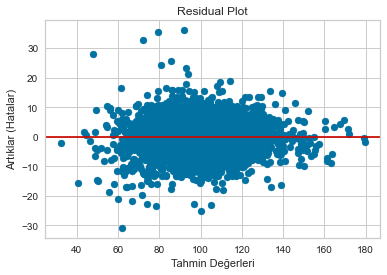

In [109]:
import statsmodels.api as sm

# Modelinizi eğitip tahminleri yapın

# Residual plot oluşturun

plt.scatter(y_pred, y_test-y_pred)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Tahmin Değerleri')
plt.ylabel('Artıklar (Hatalar)')
plt.title('Residual Plot')
plt.show()

In [148]:
df_forwards_test.drop(columns=["Name","Position", "Best Pos", "CA","PA","Preferred Foot_Left","L Th","Height","Weight"])

,Age,Wor,Vis,Tec,Tea,Str,Sta,Pos,Pen,Pas,...,Cnt,Cmp,Bra,Bal,Ant,Agi,Agg,Acc,Preferred Foot_Either,Preferred Foot_Right
0,27,8,14,13,9,14,13,6,10,12,...,8,12,14,15,10,12,9,13,0,1
1,28,17,7,12,15,14,12,10,13,10,...,11,14,12,15,12,13,13,12,0,1
2,23,12,12,13,11,11,11,6,12,12,...,9,12,13,13,11,15,12,14,0,1
3,21,11,12,13,11,7,13,9,6,12,...,12,12,5,10,12,13,6,14,0,1
4,16,12,12,15,11,13,11,5,12,12,...,11,14,10,12,11,12,11,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,16,11,10,14,8,3,6,5,6,14,...,6,8,8,8,8,10,7,14,0,1
1242,26,9,11,10,8,15,15,6,9,8,...,9,10,8,13,8,11,13,14,0,1
1243,20,9,9,10,8,6,8,7,5,11,...,8,5,8,7,8,14,5,14,0,1
1244,26,12,13,15,12,10,11,11,12,13,...,10,9,9,10,13,14,8,12,0,0


In [150]:
y_pred_test = predict_model(catboost, data=df_forwards_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,5.7662,54.5212,7.3838,0.6216,0.0569,0.0458


In [151]:
# Tahminleriniz y_pred ve gerçek değerleriniz y_test olarak varsayalım

# MAE (Mean Absolute Error)
mae = mean_absolute_error(df_test.PA, y_pred_test)
print("MAE:", mae)

# MSE (Mean Squared Error)
mse = mean_squared_error(df_test.PA, y_pred_test)
print("MSE:", mse)

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(df_test.PA, y_pred_test, squared=False)
print("RMSE:", rmse)

# R2 Score
r2 = r2_score(df_test.PA, y_pred_test)
print("R2 Score:", r2)

ValueError: Found input variables with inconsistent numbers of samples: [3675, 1246]

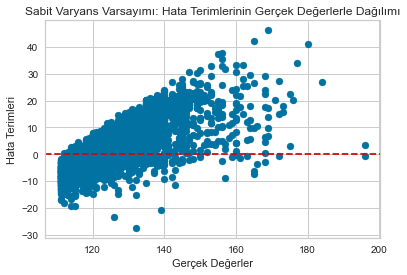

In [272]:
# Hata terimlerinin grafiksel olarak kontrolü
fig, ax = plt.subplots()
ax.scatter(df_test.PA, df_test.PA-y_pred_test)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Gerçek Değerler')
ax.set_ylabel('Hata Terimleri')
plt.title('Sabit Varyans Varsayımı: Hata Terimlerinin Gerçek Değerlerle Dağılımı')
plt.show()